# Introduction

Classify plankton species (with detritus removed) using random forests.

In [1]:
import pandas as pd
import numpy as np

Load he data which have been preprocessed in R.

In [2]:
train = pd.read_csv("../../../data/processed/labelled-features/labelled-features-train.csv")
train = train.set_index('index')

test = pd.read_csv("../../../data/processed/labelled-features/labelled-features-test.csv")
test = test.set_index('index')

In [3]:
print(train["label3"].unique())

['annelida_polychaeta' 'appendicularia' 'bivalvia-larvae' 'byrozoa-larvae'
 'chaetognatha' 'cirripedia_barnacle-nauplii' 'cladocera'
 'cladocera_evadne-spp' 'cnidaria' 'copepod_unknown' 'copepod_calanoida'
 'copepod_calanoida_acartia-spp' 'copepod_calanoida_calanus-spp'
 'copepod_calanoida_candacia-spp' 'copepod_calanoida_centropages-spp'
 'copepod_calanoida_para-pseudocalanus-spp' 'copepod_calanoida_temora-spp'
 'copepod_cyclopoida' 'copepod_cyclopoida_corycaeus-spp'
 'copepod_cyclopoida_oithona-spp' 'copepod_cyclopoida_oncaea-spp'
 'copepod_harpacticoida' 'copepod_nauplii' 'decapoda-larvae_brachyura'
 'echniodermata-larvae' 'euphausiid' 'euphausiid_nauplii' 'fish-eggs'
 'gastropoda-larva' 'mysideacea' 'nt-bubbles' 'nt-phyto_ceratium-spp'
 'nt-phyto_rhizosolenia-spp' 'nt_phyto_chains' 'ostracoda' 'radiolaria'
 'tintinnida' 'tunicata_doliolida' 'detritus']


In [4]:
cols_remove = [col for col in train.columns if col not in ['Index', 'img_file_name', 'filename','filename.1', 'label1', 'label2', 'label3']]


Remove detritus

In [5]:
train = train[~train.label2.str.contains("detritus")]
test = test[~test.label2.str.contains("detritus")]

In [6]:
sum(train.label2 == "detritus")

0

Encode target labels with value between 0 and n_classes-1.

In [7]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
train['label3'] = LE.fit_transform(train['label3'])
test['label3'] = LE.fit_transform(test['label3'])

In [8]:
X_train = train[cols_remove]  # Features
y_train = train["label3"]

X_test = test[cols_remove]  # Features
y_test = test["label3"]

In [10]:
from sklearn.ensemble import RandomForestClassifier

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

# Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

# Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

#y_preds_df = pd.DataFrame(data = y_pred, columns = ['preds'], index = X_test.index.copy())


In [14]:
import pickle

with open('/output/models/rf-label3.pkl','wb') as f:
    pickle.dump(clf,f)

In [10]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 6.1117717003567185
Mean Squared Error: 83.98929845422117
Root Mean Squared Error: 9.164567554130482


In [11]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.2925089179548157


In [12]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[  0   0   0 ...   0   0   0]
 [  0   1   0 ...   0   0   0]
 [  0   0   2 ...   0   0   0]
 ...
 [  0   0   0 ... 103   1   0]
 [  0   0   0 ...   3   0   0]
 [  0   0   0 ...   0   0  18]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       1.00      0.14      0.25         7
           2       0.40      0.50      0.44         4
           3       0.00      0.00      0.00         9
           4       0.22      0.13      0.17        15
           5       0.50      0.14      0.22         7
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         3
           8       0.17      0.17      0.17         6
           9       0.18      0.18      0.18       165
          10       0.09      0.07      0.08        45
          11       0.43      0.59      0.49        34
          12       0.00      0.00      0.00         4
          13       0.26      0.24      0.25        

/opt/pyenv/versions/3.8.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/pyenv/versions/3.8.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/pyenv/versions/3.8.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100

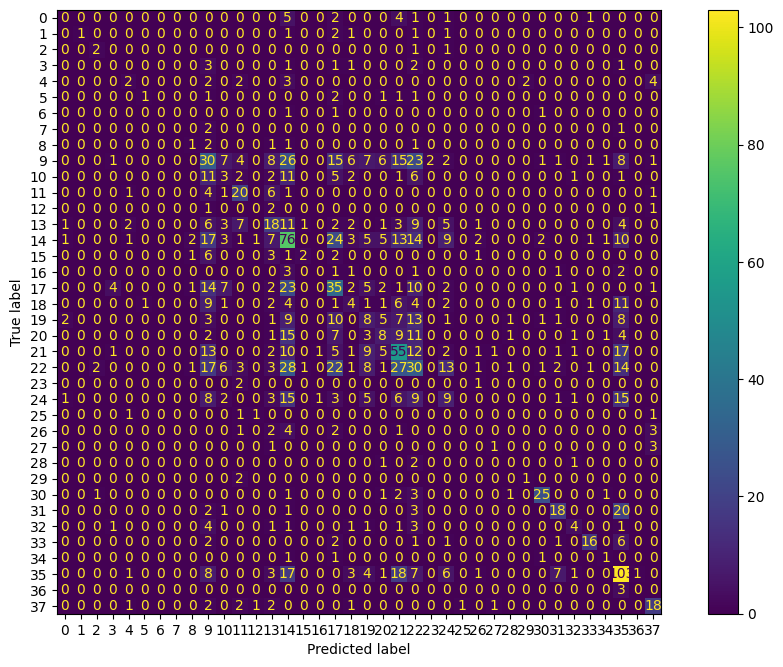

In [14]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, X_test, y_test) 
plt.show()

In [15]:
import pandas as pd
feature_names = X_train.columns
feature_imp = pd.Series(clf.feature_importances_,index=feature_names).sort_values(ascending=False)
feature_imp

object_mean                   0.137508
object_range                  0.125646
object_min                    0.119507
object_max                    0.116588
object_intden                 0.104743
object_area_exc               0.025280
object_bounding_box_area      0.024190
object_area                   0.023697
object_perim.                 0.023599
object_convex_area            0.023382
object_circex                 0.022610
object_perimareaexc           0.022387
object_circ.                  0.021767
object_equivalent_diameter    0.021610
object_elongation             0.021307
object_eccentricity           0.021075
object_perimmajor             0.020933
object_height                 0.019481
object_local_centroid_row     0.019439
object_y                      0.019358
object_major                  0.017073
object_minor                  0.013232
object_x                      0.010708
object_local_centroid_col     0.010452
object_width                  0.010234
object_angle             

In [16]:
# import matplotlib
# import matplotlib.pyplot as plt
# import seaborn as sns
# %matplotlib inline
# # Get and reshape confusion matrix data
# matrix = confusion_matrix(y_test, y_pred)
# matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
# # custom_style = {'axes.labelcolor': 'white',
# #                 'xtick.color': 'white',
# #                 'ytick.color': 'white'}
# # sns.set_style("darkgrid", rc=custom_style)
# import seaborn as sns

# ax = sns.heatmap(matrix, annot=True, cmap='viridis')

# ax.set_title('Confusion Matrix with labels\n\n');
# ax.set_xlabel('\nPredicted Values');
# ax.set_ylabel('Actual Values ');

# ## Ticket labels - List must be in alphabetical order
# ax.xaxis.set_ticklabels(['False','True'])
# ax.yaxis.set_ticklabels(['False','True'])

# ## Display the visualization of the Confusion Matrix.
# plt.show()

No handles with labels found to put in legend.


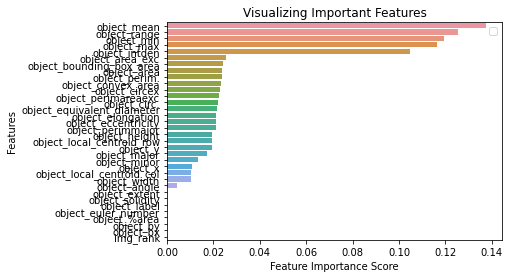

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()